#Download Dataset from Kaggle

In [ ]:
!mkdir ~/.kaggle
!echo '{"username":"sugamg","key":"1792e2ee754d04b48e513a662449d614"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download sugamg/wildlife-aerial-imagery-dataset
!unzip wildlife-aerial-imagery-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/sugamg/wildlife-aerial-imagery-dataset
License(s): DbCL-1.0
Archive:  wildlife-aerial-imagery-dataset.zip
  inflating: WAID-final - Copy/classes.txt  
  inflating: WAID-final - Copy/images/test/dataset_2500.jpg  
  inflating: WAID-final - Copy/images/test/dataset_2501.jpg  
  inflating: WAID-final - Copy/images/test/dataset_2502.JPG  
  inflating: WAID-final - Copy/images/test/dataset_2503.JPG  
  inflating: WAID-final - Copy/images/test/dataset_2504.JPG  
  inflating: WAID-final - Copy/images/test/dataset_2505.JPG  
  inflating: WAID-final - Copy/images/test/dataset_2506.JPG  
  inflating: WAID-final - Copy/images/test/dataset_2507.JPG  
  inflating: WAID-final - Copy/images/test/dataset_2508.JPG  
  inflating: WAID-final - Copy/images/test/dataset_2509.JPG  
  inflating: WAID-final - Copy/images/test/dataset_2510.jpg  
  inflating: WAID-final - Copy/images/test/dataset_2511.jpg  
  inflating: WAID-final - Copy/images/test/dataset_2512.jpg 

In [ ]:
#install ultralytics
! pip install ultralytics

Cloning repo from github for trained weights

In [ ]:
!git clone "https://github.com/sugam-ganachari/Multiscale-Feature-Extraction-for-Enhanced-Wildlife-and-Intrusion-Detection-Using-UAV-Imagery.git"

Cloning into 'Multiscale-Feature-Extraction-for-Enhanced-Wildlife-and-Intrusion-Detection-Using-UAV-Imagery'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 22 (delta 4), reused 17 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 21.51 MiB | 21.00 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
from ultralytics import YOLO
import torch

#Training Model

In [ ]:
# Load the YOLOv10 model
model = YOLO("/content/Multiscale-Feature-Extraction-for-Enhanced-Wildlife-and-Intrusion-Detection-Using-UAV-Imagery/Models/yolov10n.pt")
# Check if GPU is available and set the device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)  # Move model to GPU if available

# Print whether GPU is being used
if device == 'cuda':
    print("Using GPU for training.")
else:
    print("Using CPU for training.")

# Specify the path to your dataset YAML file
data_path = "/content/Multiscale-Feature-Extraction-for-Enhanced-Wildlife-and-Intrusion-Detection-Using-UAV-Imagery/data.yaml"

# Training the model with decreased epochs and early stopping
results = model.train(
    data=data_path,
    epochs=75,          # Maximum epochs
    imgsz=512,
    batch=8,
    patience=10    # Number of epochs with no improvement after which training will be stopped
)

# Print results
print(results)


Using GPU for training.
engine/trainer: task=detect, mode=train, model=/content/Multiscale-Feature-Extraction-for-Enhanced-Wildlife-and-Intrusion-Detection-Using-UAV-Imagery/Models/yolov10n.pt, data=/content/Multiscale-Feature-Extraction-for-Enhanced-Wildlife-and-Intrusion-Detection-Using-UAV-Imagery/data.yaml, epochs=75, time=None, patience=10, batch=8, imgsz=512, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show

100%|██████████| 755k/755k [00:00<00:00, 20.8MB/s]

Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1      9856  ultralytics.nn.modules.block.SCDown          [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1     36096  ultralytic

 23        [16, 19, 22]  1    865228  ultralytics.nn.modules.head.v10Detect        [10, [64, 128, 256]]          
YOLOv10n summary: 223 layers, 2,710,940 parameters, 2,710,924 gradients, 8.4 GFLOPs

Transferred 493/595 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 99.3MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 97.5±93.7 MB/s, size: 151.1 KB)


train: Scanning /content/WAID-final - Copy/labels/train... 1953 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1953/1953 [00:03<00:00, 588.74it/s]

train: New cache created: /content/WAID-final - Copy/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 45.2±17.6 MB/s, size: 229.7 KB)


val: Scanning /content/WAID-final - Copy/labels/test... 402 images, 0 backgrounds, 0 corrupt: 100%|██████████| 402/402 [00:00<00:00, 407.35it/s]

val: New cache created: /content/WAID-final - Copy/labels/test.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 75 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/75      1.41G      4.419      7.445      2.504         35        512: 100%|██████████| 245/245 [00:49<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:04<00:00,  5.43it/s]


                   all        402       4770      0.364      0.338      0.254      0.103

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/75      1.73G      4.336      5.456      2.468         94        512:  16%|█▌        | 39/245 [00:07<00:41,  4.93it/s]


KeyboardInterrupt: 

In [ ]:
# Save the model to a specified path
# model.save('final_model_2.pt')  # Replace 'path_to_save_model.pt' with your desired path

#Load the Saved Model

In [3]:
import os
import shutil
from sklearn.model_selection import train_test_split
from ultralytics import YOLO
import torch
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
%matplotlib inline

model = YOLO("/content/Multiscale-Feature-Extraction-for-Enhanced-Wildlife-and-Intrusion-Detection-Using-UAV-Imagery/TrainedModels/trained_yolov10.pt")
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)  # Move model to GPU if available
data_path = "/content/Multiscale-Feature-Extraction-for-Enhanced-Wildlife-and-Intrusion-Detection-Using-UAV-Imagery/data.yaml"
# Print whether GPU is being used
if device == 'cuda':
    print("Using GPU for training.")
else:
    print("Using CPU for training.")


In [ ]:
# Validation on the test set and specify the classes
test_results = model.val(
    data=data_path,          # Reuse the same data YAML file
    split='test',            # Use the test set
    task='detect',           # Specify the task (optional, based on context)
    conf=0.25,               # Confidence threshold (adjust if needed)
    iou=0.45                # IoU threshold for NMS
#     classes=[0, 1, 2, 4, 8]  # Specify the classes to evaluate
)

# Extract and print the confusion matrix
print("Confusion Matrix for selected classes:")
print(test_results.confusion_matrix)


YOLOv10n summary (fused): 102 layers, 2,267,118 parameters, 0 gradients, 6.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2617.7±1122.7 MB/s, size: 165.2 KB)


val: Scanning /content/WAID-final - Copy/labels/test.cache... 402 images, 0 backgrounds, 0 corrupt: 100%|██████████| 402/402 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  5.01it/s]


                   all        402       4770      0.734      0.794      0.816      0.467
                 sheep         60       1972      0.766      0.793      0.829       0.45
                cattle         60        799      0.798      0.798       0.84      0.505
                  seal         60        425      0.735      0.842      0.838      0.545
                 kiang         60        470      0.666      0.696      0.731      0.392
               camelus         60        369      0.723      0.707      0.767      0.384
                 zebra         60        404      0.654      0.772      0.782      0.473
             crocodile          8          8      0.727          1      0.916      0.659
              elephant         18        293       0.69      0.669      0.721      0.271
                  deer          8          8      0.739       0.71      0.812      0.449
                 horse          8         22       0.84      0.955      0.918      0.541
Speed: 0.2ms preproce

In [ ]:
import cv2
import matplotlib.pyplot as plt
def draw_predictions(image_path, model, box_color=(0, 255, 0), text_color=(255, 0, 0), conf_threshold=0.5):
    # Read the image
    if type(image_path) is str:
        image = cv2.imread(image_path)
    else:
        image = image_path
    # Run prediction
    results = model.predict(image_path)

    for result in results:
        for box in result.boxes:
            conf = box.conf[0]  # Confidence score

            if conf >= conf_threshold:  # Filter by confidence threshold
                x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
                class_id = int(box.cls[0])  # Class ID
                class_name = model.names[class_id]  # Class label

                # Draw bounding box
                cv2.rectangle(image, (x1, y1), (x2, y2), box_color, 2)

                # Add label and confidence score
                label = f'{class_name} {conf:.2f}'
                cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, text_color, 2)

    # Convert BGR to RGB for displaying
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image
    # plt.imshow(image_rgb)
    # plt.axis('off')
    # plt.show()
    return results

#MultiScale Feature Extracion & Fusion Encoder/Module

In [ ]:
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import random
from PIL import Image

torch.manual_seed(42)
torch.cuda.manual_seed(42)
np.random.seed(42)
random.seed(42)

def multiscale_feature_extraction(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image_tensor = torch.from_numpy(image).float().permute(2, 0, 1).unsqueeze(0) / 255.0  # Shape: [1, 3, H, W]

    def conv1x1(in_channels):
        conv = nn.Conv2d(in_channels, in_channels, kernel_size=1, bias=False)
        nn.init.eye_(conv.weight[:, :, 0, 0])  # Identity transformation
        return conv

    conv_layer = conv1x1(3)

    L0 = F.interpolate(image_tensor, size=(512, 512), mode="bilinear", align_corners=False)  # Large
    M0 = F.interpolate(image_tensor, size=(384, 384), mode="bilinear", align_corners=False)  # Medium
    S0 = F.interpolate(image_tensor, size=(256, 256), mode="bilinear", align_corners=False)  # Small

    L0 = conv_layer(L0)
    M0 = conv_layer(M0)
    S0 = conv_layer(S0)

    s1 = conv_layer(S0)
    m2 = conv_layer(M0)

    s1_upsampled = F.interpolate(s1, size=(384, 384), mode='bilinear', align_corners=False)
    s1_m2 = torch.cat((s1_upsampled, m2), dim=1)

    conv_layer_2 = nn.Conv2d(s1_m2.shape[1], 3, kernel_size=1, bias=False)
    nn.init.eye_(conv_layer_2.weight[:, :, 0, 0])

    m2_combined = conv_layer_2(s1_m2)
    m2_combined_upsampled = F.interpolate(m2_combined, size=(512, 512), mode='bilinear', align_corners=False)
    l1_m2 = torch.cat((L0, m2_combined_upsampled), dim=1)

    yolo_head_1 = conv_layer(s1)
    yolo_head_2 = conv_layer(m2_combined)
    yolo_head_3 = conv_layer_2(l1_m2)

    def tensor_to_image(tensor):
        image_tensor = tensor.squeeze(0).permute(1, 2, 0).detach().clamp(0, 1)
        image_numpy = (image_tensor.numpy() * 255).astype(np.uint8)
        return Image.fromarray(image_numpy)

    tensor_to_image(yolo_head_1)
    tensor_to_image(yolo_head_2)
    tensor_to_image(yolo_head_3)

#     print("✅ YOLO Head 1 (S0, 256x256):", yolo_head_1.shape)
#     print("✅ YOLO Head 2 (M0, 384x384) :", yolo_head_2.shape)
#     print("✅ YOLO Head 3 (L0, 512x512):", yolo_head_3.shape)

    return yolo_head_1, yolo_head_2, yolo_head_3


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

def yolo_to_xyxy(box, img_width, img_height):
    """
    Convert YOLO format [x_center, y_center, width, height] to [x1, y1, x2, y2].
    """
    x_center, y_center, width, height = box
    x1 = (x_center - width / 2) * img_width
    y1 = (y_center - height / 2) * img_height
    x2 = (x_center + width / 2) * img_width
    y2 = (y_center + height / 2) * img_height
    return [x1, y1, x2, y2]

def calculate_iou(box1, box2):
    """
    Calculate Intersection over Union (IoU) between two bounding boxes.
    Each box is defined as [x1, y1, x2, y2].
    """
    # Determine the coordinates of the intersection rectangle
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    # Compute the area of intersection
    intersection = max(0, x2 - x1) * max(0, y2 - y1)

    # Compute the area of both bounding boxes
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    # Compute IoU
    iou = intersection / float(box1_area + box2_area - intersection)
    return iou

def load_ground_truth(label_path, img_width, img_height):
    """
    Load ground truth bounding boxes from a label file and convert them to [x1, y1, x2, y2] format.
    """
    ground_truth_boxes = []
    with open(label_path, 'r') as file:
        for line in file:
            class_id, x_center, y_center, width, height = map(float, line.strip().split())
            box = yolo_to_xyxy([x_center, y_center, width, height], img_width, img_height)
            ground_truth_boxes.append(box)
    return ground_truth_boxes

def compare_predictions(image1_results, image2_results, ground_truth_boxes):
    """
    Compare predictions of two images using confidence scores, number of detections,
    precision, recall, IoU, and inference time.
    """
    # Access the first element in the results list
#     image1_results = image1_results[0]
#     image2_results = image2_results[0]

    # Extract confidence scores
    image1_confidences = image1_results.boxes.conf.cpu().numpy()  # Convert to numpy array
    image2_confidences = image2_results.boxes.conf.cpu().numpy()  # Convert to numpy array

    # Number of detections
    image1_num_detections = len(image1_confidences)
    image2_num_detections = len(image2_confidences)

    # Inference time
    image1_inference_time = image1_results.speed['inference']
    image2_inference_time = image2_results.speed['inference']

    # Precision and Recall
    # Create y_true (all 1s for ground truth boxes)
    y_true = [1] * len(ground_truth_boxes)

    # Create y_pred for image 1
    image1_preds = [1] * image1_num_detections
    if len(image1_preds) < len(y_true):
        image1_preds += [0] * (len(y_true) - len(image1_preds))  # Pad with 0s
    elif len(image1_preds) > len(y_true):
        image1_preds = image1_preds[:len(y_true)]  # Truncate to match length

    # Create y_pred for image 2
    image2_preds = [1] * image2_num_detections
    if len(image2_preds) < len(y_true):
        image2_preds += [0] * (len(y_true) - len(image2_preds))  # Pad with 0s
    elif len(image2_preds) > len(y_true):
        image2_preds = image2_preds[:len(y_true)]  # Truncate to match length

    # Calculate precision and recall
    image1_precision = precision_score(y_true, image1_preds, zero_division=0)
    image1_recall = recall_score(y_true, image1_preds, zero_division=0)
    image2_precision = precision_score(y_true, image2_preds, zero_division=0)
    image2_recall = recall_score(y_true, image2_preds, zero_division=0)

    # Average IoU
    image1_ious = []
    for pred_box in image1_results.boxes.xyxy.cpu().numpy():
        ious = [calculate_iou(pred_box, gt_box) for gt_box in ground_truth_boxes]
        print(f"Pred Box: {pred_box}, IoUs: {ious}")  # Debug print
        if ious:  # Ensure non-empty list
            image1_ious.append(max(ious))
    image1_avg_iou = np.mean(image1_ious) if image1_ious else 0

    image2_ious = []
    for pred_box in image2_results.boxes.xyxy.cpu().numpy():
        ious = [calculate_iou(pred_box, gt_box) for gt_box in ground_truth_boxes]
#         print(f"Pred Box: {pred_box}, IoUs: {ious}")  # Debug print
        if ious:  # Ensure non-empty list
            image2_ious.append(max(ious))
    image2_avg_iou = np.mean(image2_ious) if image2_ious else 0

    image1_avg_confidence = sum(image1_confidences) / image1_num_detections if image1_num_detections > 0 else 0
    image2_avg_confidence = sum(image2_confidences) / image2_num_detections if image2_num_detections > 0 else 0

    # Print comparison results
#     print("Comparison Results:")
#     print(f"Image 1 - Avg Confidence Score: {image1_avg_confidence}")
#     print(f"Image 2 - Avg Confidence Score: {image2_avg_confidence}")
#     print(f"Image 1 - Number of Detections: {image1_num_detections}")
#     print(f"Image 2 - Number of Detections: {image2_num_detections}")
#     print(f"Image 1 - Inference Time: {image1_inference_time} ms")
#     print(f"Image 2 - Inference Time: {image2_inference_time} ms")
#     print(f"Image 1 - Precision: {image1_precision}, Recall: {image1_recall}, Avg IoU: {image1_avg_iou}")
#     print(f"Image 2 - Precision: {image2_precision}, Recall: {image2_recall}, Avg IoU: {image2_avg_iou}")

    return (image1_avg_confidence, image2_avg_confidence,
    image1_num_detections, image2_num_detections,
    image1_inference_time, image2_inference_time,
    image1_precision, image1_recall, image1_avg_iou,
    image2_precision, image2_recall, image2_avg_iou)

# Load ground truth bounding boxes from label.txt
img_width, img_height = 512,512  # Replace with actual image dimensions
ground_truth_boxes = load_ground_truth("/content/WAID-final - Copy/labels/test/dataset_2500.txt", img_width, img_height)

# Compare predictions
compare_predictions(fi_1[0], fi_2[0], ground_truth_boxes)

Pred Box: [     75.102       93.38      102.49       122.4], IoUs: [np.float32(0.0), 0.0, 0.0, np.float32(0.0), 0.0, np.float32(0.0), 0.0, 0.0, 0.0, 0.0, np.float32(0.0), 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Pred Box: [     50.113       64.67      81.451      90.462], IoUs: [np.float32(0.0), 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Pred Box: [     57.475      171.99      78.339       215.7], IoUs: [np.float32(0.055001426), 0.0, np.float32(0.0), 0.0, 0.0, 0.0, np.float32(0.0), np.float32(0.0), np.float32(0.0), 0.0, 0.0, np.float32(0.0), np.float32(0.0), 0.0, 0.0, np.float32(0.0), np.float32(0.0), 0.0, 0.0, np.float32(0.0)]
Pred Box: [     32.032      67.766      51.842      104.43], IoUs: [0.0, 0.0, 0.0, np.float32(0.0), 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Pred Box: [     70.736      46.622      94.342      74.528], IoUs: [np.float32(0.0), 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

(np.float32(0.50079435),
 np.float32(0.4839462),
 18,
 22,
 12.387429000227712,
 9.123541999997542,
 1.0,
 0.9,
 np.float64(0.03978323336276743),
 1.0,
 1.0,
 np.float64(0.5596707480815145))

Comparing With/Without Multiscale Feature Extraction using YOLOv11

In [ ]:
k = 2500
num_iterations = 400

# Initialize accumulators for averaging
total_image1_confidence = 0
total_image2_confidence = 0
total_image1_detections = 0
total_image2_detections = 0
total_image1_inference_time = 0
total_image2_inference_time = 0
total_image1_precision = 0
total_image1_recall = 0
total_image1_iou = 0
total_image2_precision = 0
total_image2_recall = 0
total_image2_iou = 0

for i in range(num_iterations):
    img_width, img_height = 512, 512  # Image dimensions
    label_path = f"/content/WAID-final - Copy/labels/test/dataset_{k+i}.txt"
    ground_truth_boxes = load_ground_truth(label_path, img_width, img_height)

    image_path = f"/content/WAID-final - Copy/images/test/dataset_{k+i}.jpg"
    if not os.path.exists(image_path):
        image_path = image_path.replace(".jpg", ".JPG")  # Try .JPG extension
        if not os.path.exists(image_path):
            print(f"Image file not found: dataset_{k+i}.jpg or dataset_{k+i}.JPG")
            continue  # Skip to the next iteration
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (256, 256))

    fi_1 = draw_predictions(
        image_path=resized_image,
        model=model,
        box_color=(0, 255, 0),  # Green bounding box
        text_color=(255, 0, 0),  # Blue text
        conf_threshold=0.5
    )

    yolo_head_1, yolo_head_2, yolo_head_3 = multiscale_feature_extraction(image_path)
    predict_img = tensor_to_image(yolo_head_3)
    predict_img = np.array(predict_img)  # Convert PIL image to NumPy
    predict_img = cv2.cvtColor(predict_img, cv2.COLOR_RGB2BGR)

    fi_2 = draw_predictions(
        image_path=predict_img,
        model=model,
        box_color=(0, 255, 0),  # Green bounding box
        text_color=(255, 0, 0),  # Blue text
        conf_threshold=0.5
    )

    # Get comparison metrics
    (img1_conf, img2_conf, img1_det, img2_det, img1_time, img2_time,
     img1_prec, img1_rec, img1_iou, img2_prec, img2_rec, img2_iou) = compare_predictions(fi_1[0], fi_2[0], ground_truth_boxes)

    # Accumulate results
    total_image1_confidence += img1_conf
    total_image2_confidence += img2_conf
    total_image1_detections += img1_det
    total_image2_detections += img2_det
    total_image1_inference_time += img1_time
    total_image2_inference_time += img2_time
    total_image1_precision += img1_prec
    total_image1_recall += img1_rec
    total_image1_iou += img1_iou
    total_image2_precision += img2_prec
    total_image2_recall += img2_rec
    total_image2_iou += img2_iou

# Compute averages
average_image1_confidence = total_image1_confidence / num_iterations
average_image2_confidence = total_image2_confidence / num_iterations
average_image1_detections = total_image1_detections / num_iterations
average_image2_detections = total_image2_detections / num_iterations
average_image1_inference_time = total_image1_inference_time / num_iterations
average_image2_inference_time = total_image2_inference_time / num_iterations
average_image1_precision = total_image1_precision / num_iterations
average_image1_recall = total_image1_recall / num_iterations
average_image1_iou = total_image1_iou / num_iterations
average_image2_precision = total_image2_precision / num_iterations
average_image2_recall = total_image2_recall / num_iterations
average_image2_iou = total_image2_iou / num_iterations

# Print final averaged results
print("\nFinal Averaged Results:")
print(f"Avg Image 1 Confidence Score: {average_image1_confidence}")
print(f"Avg Image 2 Confidence Score: {average_image2_confidence}")
print(f"Avg Image 1 Detections: {average_image1_detections}")
print(f"Avg Image 2 Detections: {average_image2_detections}")
print(f"Avg Image 1 Inference Time: {average_image1_inference_time} ms")
print(f"Avg Image 2 Inference Time: {average_image2_inference_time} ms")
print(f"Avg Image 1 Precision: {average_image1_precision}, Recall: {average_image1_recall}, IoU: {average_image1_iou}")
print(f"Avg Image 2 Precision: {average_image2_precision}, Recall: {average_image2_recall}, IoU: {average_image2_iou}")


Streaming output truncated to the last 5000 lines.
Pred Box: [     212.97      118.47      221.55      148.87], IoUs: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, np.float32(0.0), np.float32(0.0), np.float32(0.0), 0.0, np.float32(0.0), np.float32(0.0), 0.0, np.float32(0.0), np.float32(0.0), np.float32(0.0), 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Pred Box: [     35.134      159.42      45.455      169.26], IoUs: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, np.float32(0.0), 0.0, np.float32(0.0), 0.0, np.float32(0.0), np.float32(0.0), np.float32(0.0), np

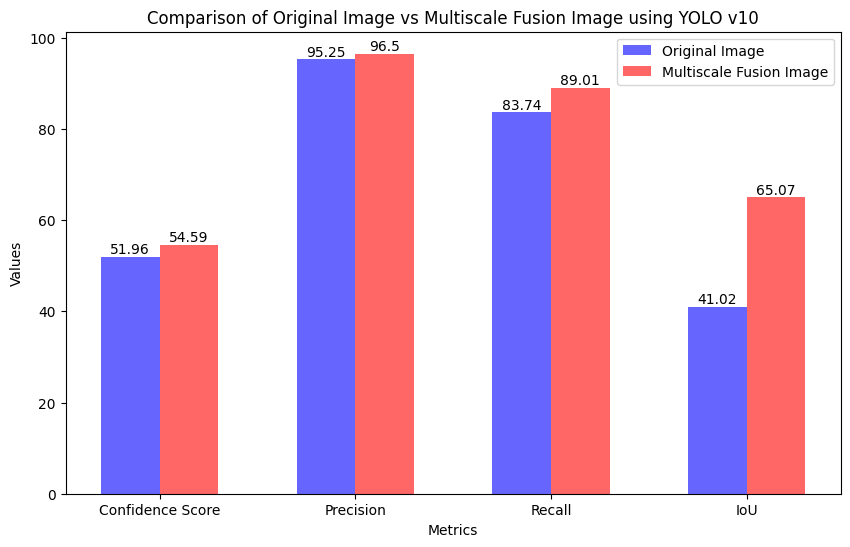

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = ["Confidence Score", "Precision", "Recall", "IoU"]
image1_values = [51.96, 95.25, 83.74, 41.02]
image2_values = [54.59, 96.5, 89.01, 65.07]

# Create bar width
bar_width = 0.3
index = np.arange(len(metrics))

# Plot bars
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index - bar_width/2, image1_values, bar_width, label="Original Image", color='b', alpha=0.6)
bar2 = ax.bar(index + bar_width/2, image2_values, bar_width, label="Multiscale Fusion Image", color='r', alpha=0.6)

# Labels and title
ax.set_xlabel("Metrics")
ax.set_ylabel("Values")
ax.set_title("Comparison of Original Image vs Multiscale Fusion Image using YOLO v10")
ax.set_xticks(index)
ax.set_xticklabels(metrics)
ax.legend()

# Display values on bars
for bar in bar1 + bar2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

# Show plot
plt.show()
